<a href="https://colab.research.google.com/github/Sleepybutterfly01/fmml-lab/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1.how is the accuracy of the validation set affected if we increse the percentage of validation set?what happens when we reduce it?

A.The accuracy of a model on the validation set can be affected when you increase or reduce the percentage of data allocated to the validation set during the training process. Let's explore how these changes can impact validation accuracy:

1. **Increase in Validation Set Percentage:**

   - **Pros:**
     - More data for validation can lead to a better estimate of the model's performance. It helps in assessing how well the model generalizes to unseen data.
     - With a larger validation set, the validation accuracy becomes a more reliable indicator of the model's true performance.

   - **Cons:**
     - If you allocate a significant portion of your data to the validation set, you might have less data available for training. This can lead to underfitting if the training set is too small.
     - It can be computationally expensive, as you might need more epochs to train the model effectively.

   - **Impact on Validation Accuracy:**
     - Initially, you may see an increase in validation accuracy as you allocate more data for validation, but there could be diminishing returns beyond a certain point. If too much data is in the validation set, the model may not learn enough from the training data to perform well.

2. **Reduction in Validation Set Percentage:**

   - **Pros:**
     - More data available for training can help the model learn better representations and reduce the risk of underfitting.
     - Training might be faster since you have a larger training set.

   - **Cons:**
     - A smaller validation set may lead to less reliable estimates of model performance, as there's less data for evaluation.
     - You might risk overfitting if the model becomes too complex and there isn't enough data in the validation set to detect it.

   - **Impact on Validation Accuracy:**
     - Initially, you may see an increase in validation accuracy as the model benefits from a larger training set. However, as you reduce the validation set size, the reliability of the accuracy estimate decreases. The reported validation accuracy may fluctuate more and may not be a good indicator of true model performance.

The choice of the percentage allocated to the validation set depends on the specific dataset, the complexity of the model, and the computational resources available. It's essential to strike a balance that allows the model to learn effectively while still providing a reliable estimate of its performance. Techniques like cross-validation can also be used to mitigate the impact of validation set size on model evaluation.

2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

A.The size of the training and validation sets can significantly affect how well you can predict the accuracy of a model on the test set using the validation set. Here's how different scenarios play out:

1. **Large Training Set, Small Validation Set:**
   - If you have a large training set but a small validation set, you may risk overfitting. The model could perform well on the training data but poorly on unseen data.
   - In this scenario, the validation accuracy might not be a reliable indicator of the test set accuracy. The model may perform well on the validation set but poorly on the test set because it has not generalized well.

2. **Small Training Set, Large Validation Set:**
   - When you have a small training set but a large validation set, you might face underfitting issues. The model may not learn enough from the limited training data.
   - The validation accuracy can still provide some information about model performance, but it may not be a strong predictor of test set accuracy. The model might not have had sufficient training to generalize effectively.

3. **Balanced Training and Validation Sets:**
   - Ideally, you want a balanced allocation of data between the training and validation sets. This ensures that the model both learns well from the training data and is evaluated on a representative portion of the dataset.
   - In this scenario, the validation accuracy is more likely to be a good predictor of the test set accuracy. If the model performs well on the validation set, it's more likely to generalize well to unseen data, provided that both sets are representative of the underlying data distribution.

4. **Cross-Validation:**
   - Cross-validation techniques, such as k-fold cross-validation, can mitigate the impact of dataset size imbalances. They involve splitting the data into multiple subsets (folds) and training and validating the model multiple times, rotating which fold serves as the validation set.
   - Cross-validation provides a more robust estimate of model performance since it considers multiple validation sets. It can help account for variations in performance due to different data splits.

In summary, the size of the training and validation sets does affect how well you can predict the accuracy on the test set. A balanced allocation of data is preferred, but if that's not possible due to limited data, techniques like cross-validation can help improve the reliability of your predictions regarding test set accuracy. A well-designed validation process is crucial for effectively assessing a model's generalization performance.

3.What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

A.There is no one-size-fits-all answer to the question of what percentage of your data to reserve for the validation set, as the ideal split depends on several factors, including the size of your dataset, the complexity of your model, and your specific goals. However, a common practice is to use a 70-30 or 80-20 split for training and validation, respectively. This means that you reserve 20-30% of your data for validation.

Here are some considerations to help you decide on an appropriate split:

1. **Dataset Size:**
   - If you have a small dataset, you may want to allocate a larger percentage to the validation set to ensure a reasonable amount of data for model evaluation.
   - With a large dataset, you can afford to reserve a smaller percentage for validation, as you still have a substantial amount of data for training.

2. **Model Complexity:**
   - Complex models, such as deep neural networks with many parameters, might require larger validation sets to assess their generalization properly.
   - Simpler models may be able to perform well with smaller validation sets.

3. **Computational Resources:**
   - Training a model with a larger training set can be computationally expensive. If you have limited resources, you might need to adjust the split to allocate more data to training.

4. **Goals and Tolerance for Risk:**
   - If you have a low tolerance for overfitting and want a conservative estimate of model performance, consider allocating a larger percentage to validation.
   - If you are more concerned with maximizing the amount of data used for training and are willing to take some risk of overfitting, you can allocate a smaller percentage to validation.

5. **Cross-Validation:**
   - If you want to obtain a more robust estimate of model performance and mitigate the impact of the validation set size, consider using k-fold cross-validation, which divides the data into multiple folds and iteratively uses each as a validation set.

In practice, starting with a 70-30 or 80-20 split is often a reasonable choice for a balanced trade-off between model training and evaluation. However, you should also consider experimenting with different splits, cross-validation, and monitoring model performance to determine the best approach for your specific problem and dataset. The goal is to ensure that your model generalizes well while making efficient use of your available data.



## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [15]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1.Does averaging the validation accuracy across multiple splits give more consistent results?


A.Yes, averaging the validation accuracy across multiple splits, such as using k-fold cross-validation, can give more consistent and reliable results when evaluating a machine learning model. This technique helps reduce the variability in the validation performance estimate and provides a more robust assessment of how well the model is likely to perform on unseen data.

Here are some key benefits of averaging validation accuracy across multiple splits:

1. **Reduced Variability:** When you split your data into multiple subsets (folds) and perform validation multiple times, you get a sense of how your model performs on different subsets of the data. This reduces the impact of any particular random split on the evaluation results.

2. **Better Generalization Estimate:** By averaging the results from different folds, you obtain a more representative estimate of the model's generalization performance. This can help you make more informed decisions about the model's suitability for deployment.

3. **Improved Confidence:** Averaging results provides a measure of confidence in your model's performance. You can compute statistics like the mean, standard deviation, or confidence intervals, which give you a better understanding of the expected performance range.

4. **Detecting Overfitting or Data Variability:** Cross-validation can help you detect issues like overfitting or data variability. If the model performs well on one fold but poorly on others, it may indicate that the model is sensitive to specific data subsets or that overfitting is occurring.

5. **Utilization of All Data:** Cross-validation ensures that all data points are used for both training and validation at some point, which is beneficial when working with limited datasets.

Common choices for the number of folds (k) in k-fold cross-validation are 5 or 10, but the choice can vary depending on the dataset size and your computational resources. Larger values of k provide a more stable estimate but require more computation.

In summary, averaging validation accuracy across multiple splits using techniques like k-fold cross-validation is a valuable approach for obtaining a more consistent and reliable assessment of a model's performance. It helps you make better-informed decisions about model selection, hyperparameter tuning, and understanding how well your model generalizes to unseen data.




2. Does it give more accurate estimate of test accuracy?     

A.Averaging the validation accuracy across multiple splits using techniques like k-fold cross-validation provides a more accurate estimate of how well your model is likely to perform on unseen data, including the test set. However, it's essential to clarify what we mean by "accurate estimate" in this context:

1. **Accurate Estimate of Generalization Performance:** Cross-validation provides a more accurate estimate of a model's generalization performance compared to a single train-validation split. It reduces the variability in the validation results, making the estimate more reliable.

2. **Accuracy as an Estimate:** While cross-validation gives you a more accurate estimate of how your model might perform on unseen data, it's still an estimate. The test set, which is completely held out from training and validation, provides the most accurate measure of how the model will perform in a real-world scenario.

3. **Comparison to Test Set:** The primary purpose of cross-validation is to estimate how well your model generalizes based on the data you have. While it provides a more stable estimate of performance, the actual performance on the test set could be slightly different due to differences in the test set's data distribution or size.

In practice, cross-validation results are often considered a good proxy for test accuracy, especially when you have limited data and need to make decisions about model selection, hyperparameters, or feature engineering. It's an essential step in model development and validation.

However, it's important to remember that the test set should be kept separate and used sparingly. It's typically reserved for a final evaluation of the chosen model or as a checkpoint to ensure that you haven't overfit to the validation data. The test set provides a more accurate estimate of how the model will perform in a production or real-world setting, where you encounter entirely new, unseen data.

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

A.The number of iterations, also known as epochs in the context of training machine learning models, can have an impact on the estimate of a model's performance when using techniques like cross-validation. However, the relationship between the number of iterations and the estimate's accuracy is not always straightforward, and there are trade-offs to consider.

Here's how the number of iterations can affect the estimate of a model's performance:

1. **Underfitting and Convergence:**
   - In the early stages of training, as the model learns from the data, the validation performance may improve. This is because the model is starting to capture patterns in the data.
   - Increasing the number of iterations beyond a certain point may not necessarily lead to better performance. If the model has already converged and captured most of the relevant information in the data, additional iterations might not make a significant difference.

2. **Overfitting:**
   - Increasing the number of iterations can increase the risk of overfitting, especially if the model is highly complex and the dataset is limited.
   - Overfitting occurs when the model starts fitting noise in the training data, making it perform well on the training data but poorly on unseen data (including the validation and test sets).

3. **Early Stopping:**
   - To find the optimal number of iterations, it's common to use a technique called early stopping. Early stopping involves monitoring the validation performance during training and stopping training when it starts to degrade.
   - This prevents the model from overfitting and typically results in a better estimate of its generalization performance.

4. **Cross-Validation and Iterations:**
   - When using k-fold cross-validation, each fold is trained for a certain number of iterations. The validation performance for each fold is then averaged.
   - It's important to use the same number of iterations for each fold to ensure a fair comparison. In practice, you may use early stopping within each fold to determine the optimal number of iterations.

In summary, whether increasing the number of iterations leads to a better estimate of model performance depends on various factors, including the complexity of the model, the amount of training data, and the risk of overfitting. It's essential to strike a balance by monitoring the validation performance and using techniques like early stopping to prevent overfitting. Ultimately, the goal is to find the right number of iterations that allows the model to capture patterns in the data without fitting noise and provides a reliable estimate of its generalization performance.

4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

A.Increasing the number of iterations during training can help to some extent when dealing with a very small training dataset or validation dataset, but it may not fully compensate for the limitations imposed by the dataset size. Here are some considerations:

1. **Benefits of Increasing Iterations:**

   - **More Data Exposure:** With more iterations, the model gets more exposure to the limited training data, which can help it capture more patterns and potentially improve performance.

   - **Complexity Adaptation:** Some models, especially deep learning models, have a large number of parameters and can adapt their complexity during training. More iterations allow the model to fine-tune its parameters to the training data, which might help mitigate underfitting to some extent.

2. **Limitations:**

   - **Overfitting Risk:** Increasing the number of iterations in the presence of a very small dataset can increase the risk of overfitting. The model may start memorizing the training data, fitting noise, and performing poorly on unseen data, including the validation set.

   - **Data Variability:** If the dataset is very small and not representative of the overall data distribution, no amount of additional iterations can make up for the lack of diversity in the training data.

   - **Validation Set Limitations:** A larger number of iterations won't address the limitations of a small validation dataset. The validation dataset needs to be sufficiently representative to provide a reliable estimate of model performance.

3. **Balancing Act:**

   - When working with small datasets, it's crucial to find a balance between the number of iterations, model complexity, and data size. You may need to use techniques like early stopping to prevent overfitting.

4. **Data Augmentation:**

   - Data augmentation is a technique where you artificially increase the effective size of your training dataset by applying various transformations to the existing data. This can help the model generalize better even with a small training dataset.

5. **Transfer Learning:**

   - When dealing with very limited data, transfer learning, which involves using a pre-trained model as a starting point and fine-tuning it on your dataset, can be a valuable strategy.

In summary, increasing the number of iterations can be beneficial for small datasets, but it should be done with caution to avoid overfitting. It's often more effective to explore techniques like data augmentation, transfer learning, and careful model selection to improve performance when working with limited training or validation datasets. The key is to find a balance between model complexity and the amount of available data while ensuring that the validation process is still reliable for estimating model performance.

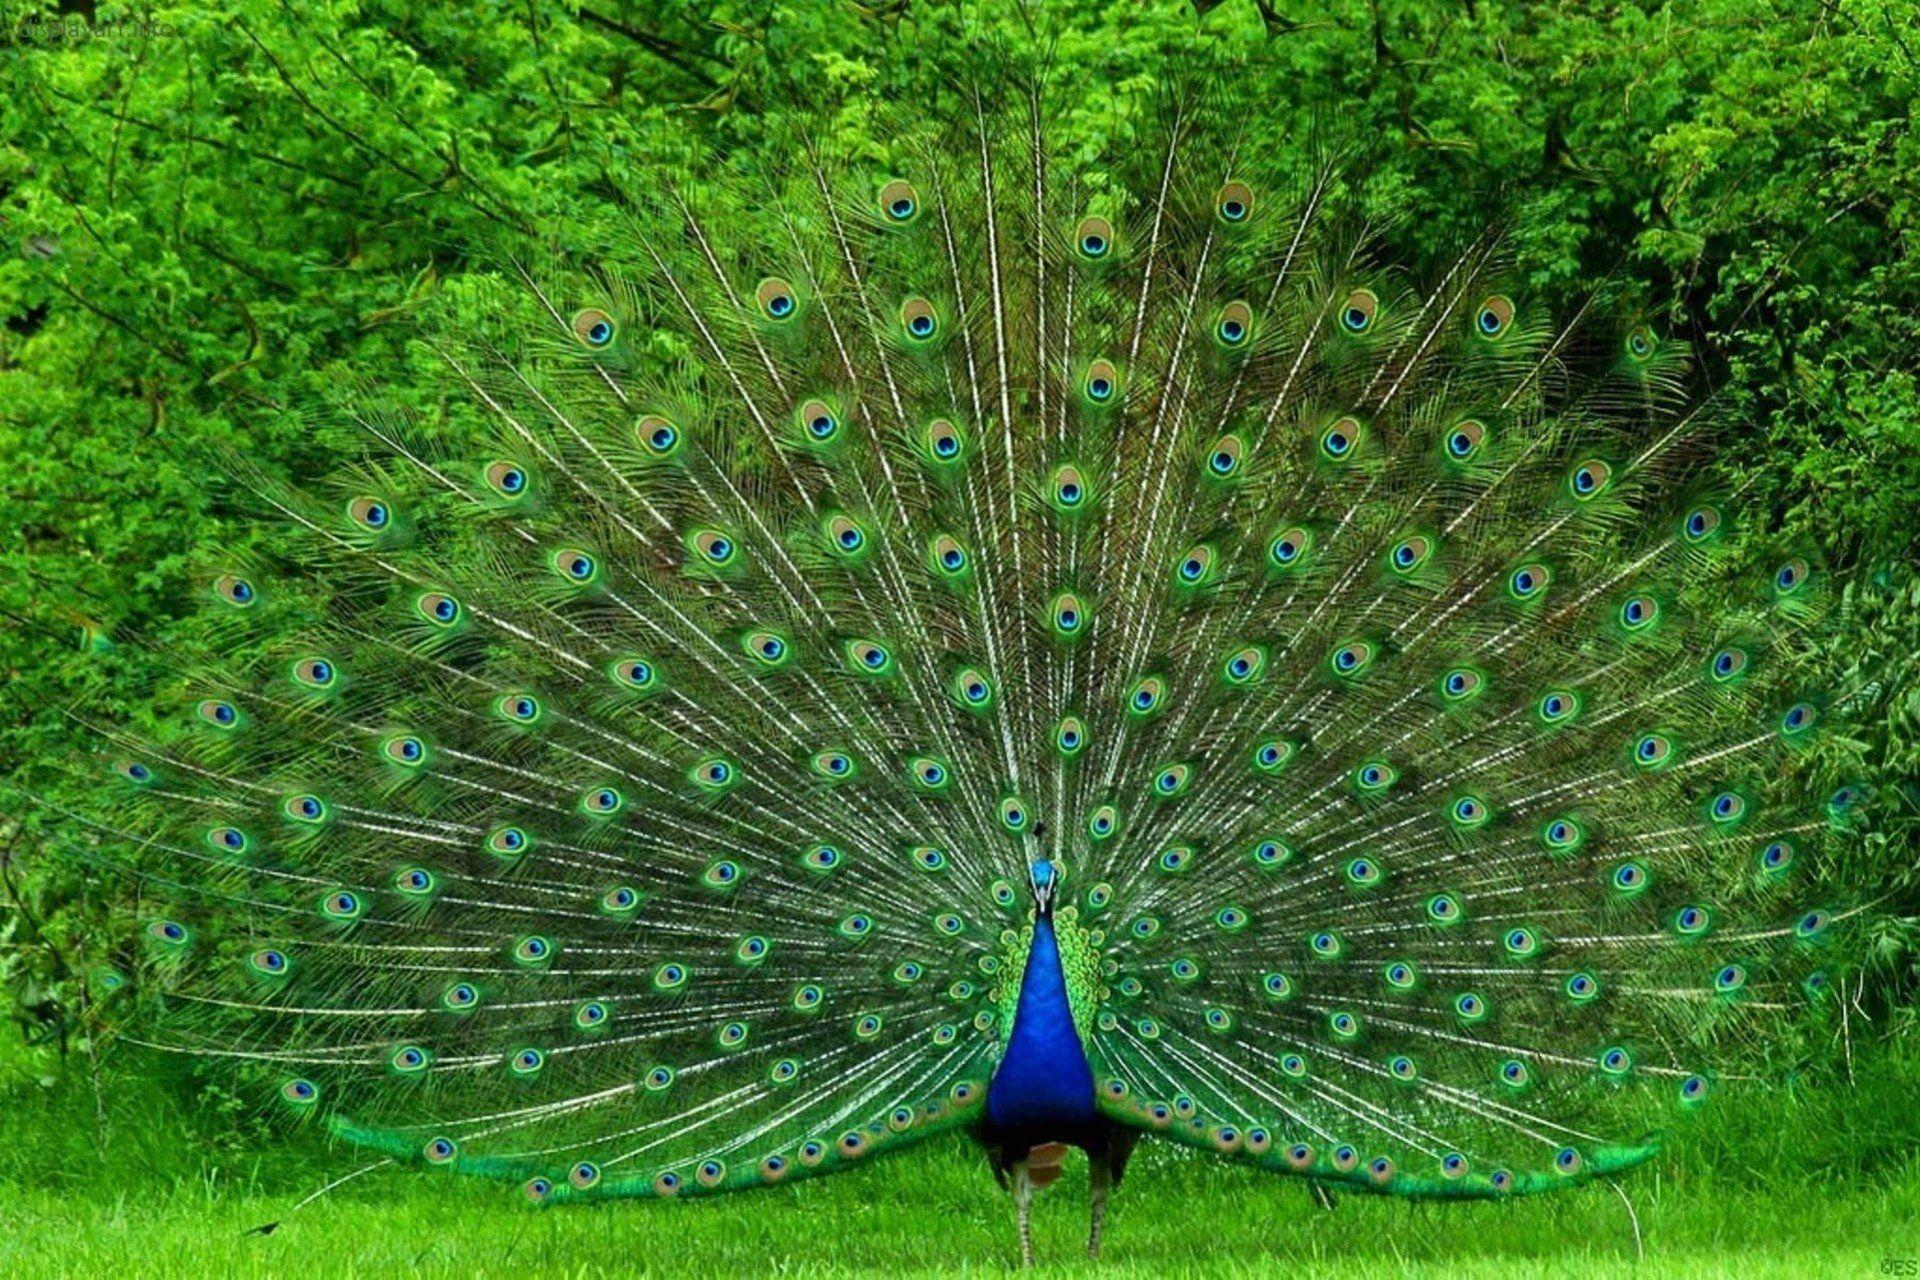